# Example use of pandas_ta
* Simple imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import pandas_ta as ta
from alphaVantageAPI.alphavantage import AlphaVantage  # pip install alphaVantage-api

e = pd.DataFrame()

### Help on Indicators (post an [issue](https://github.com/twopirllc/pandas-ta/issues) if the indicator doc needs updating)

In [2]:
e.ta.indicators()
help(ta.accbands)

pandas.ta - Technical Analysis Indicators
Total Indicators: 72
Abbreviations:
    accbands, ad, adosc, adx, ao, apo, aroon, atr, bbands, bop, cci, cmf, cmo, coppock, decreasing, dema, donchian, dpo, efi, ema, eom, fwma, hl2, hlc3, hma, ichimoku, increasing, kc, kst, kurtosis, linreg, log_return, macd, mad, massi, median, mfi, midpoint, midprice, mom, natr, nvi, obv, ohlc4, percent_return, ppo, pvol, pvt, pwma, quantile, rma, roc, rsi, skew, sma, stdev, stoch, t3, tema, trima, trix, true_range, tsi, uo, variance, vortex, vp, vwap, vwma, willr, wma, zscore
Help on function accbands in module pandas_ta.volatility:

accbands(high, low, close, length=None, c=None, drift=None, mamode=None, offset=None, **kwargs)
    Acceleration Bands (ACCBANDS)
    
    Acceleration Bands created by Price Headley plots upper and lower envelope
    bands around a simple moving average.
    
    Sources:
        https://www.tradingtechnologies.com/help/x-study/technical-indicator-definitions/acceleration-band

### Load Daily EUR.USD from [AlphaVantage](http://www.alphavantage.com) and clean it up a little

In [3]:
AV = AlphaVantage(
        api_key='HCKEW9ITOKLAIUGI',
        premium=False,
        output_size='full',
        datatype='json',
        export=False,
        export_path= 'C:/Users/Andy/Documents/AVdata',
        output='csv',
        clean=True,
        proxy={}
    )
##AV = AlphaVantage(premium=False, clean=True, output_size='full')
df = AV.fx(from_currency='USD', to_currency='EUR', function='FXD') # Daily
# df['0'] = 0
df.ta.constants(True, -4, 4)
print(f"Shape: {df.shape}")
df.set_index(['date'], inplace=True)
df.head()

Shape: (100, 14)


,open,high,low,close,-4,-3,-2,-1,0,1,2,3,4
date,,,,,,,,,,,,,
2018-12-14,1.1357,1.1365,1.1268,1.1307,-4,-3,-2,-1,0,1,2,3,4
2018-12-16,1.1303,1.1308,1.1297,1.1305,-4,-3,-2,-1,0,1,2,3,4
2018-12-17,1.1305,1.1358,1.1302,1.1347,-4,-3,-2,-1,0,1,2,3,4
2018-12-18,1.1347,1.1402,1.1335,1.1370,-4,-3,-2,-1,0,1,2,3,4
2018-12-19,1.1370,1.1439,1.1364,1.1380,-4,-3,-2,-1,0,1,2,3,4


In [4]:
list(df.columns.values)

['open',
 'high',
 'low',
 'close',
 '-4',
 '-3',
 '-2',
 '-1',
 '0',
 '1',
 '2',
 '3',
 '4']

### Price Chart with Moving Averages

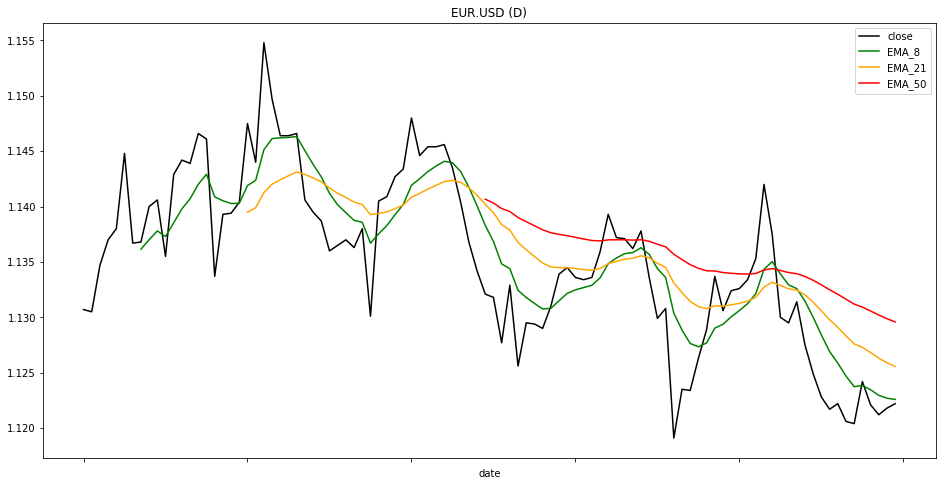

In [5]:
df.ta.ema(length=8, append=True)
df.ta.ema(length=21, append=True)
df.ta.ema(length=50, append=True)

df[['close', 'EMA_8', 'EMA_21', 'EMA_50']].plot(figsize=(16,8), color=['black', 'green', 'orange', 'red'], title="EUR.USD (D)")

In [6]:
pd.DataFrame().ta.indicators()

pandas.ta - Technical Analysis Indicators
Total Indicators: 72
Abbreviations:
    accbands, ad, adosc, adx, ao, apo, aroon, atr, bbands, bop, cci, cmf, cmo, coppock, decreasing, dema, donchian, dpo, efi, ema, eom, fwma, hl2, hlc3, hma, ichimoku, increasing, kc, kst, kurtosis, linreg, log_return, macd, mad, massi, median, mfi, midpoint, midprice, mom, natr, nvi, obv, ohlc4, percent_return, ppo, pvol, pvt, pwma, quantile, rma, roc, rsi, skew, sma, stdev, stoch, t3, tema, trima, trix, true_range, tsi, uo, variance, vortex, vp, vwap, vwma, willr, wma, zscore


In [7]:
help(pd.DataFrame().ta)

Help on AnalysisIndicators in module pandas_ta.core object:

class AnalysisIndicators(BasePandasObject)
 |  AnalysisIndicators is class that extends the Pandas DataFrame via
 |  Pandas @pd.api.extensions.register_dataframe_accessor('name') decorator.
 |  
 |  This Pandas Extension is named 'ta' for Technical Analysis that allows us
 |  to apply technical indicators with an one extension.  Even though 'ta' is
 |  now a Pandas DataFrame Extension, you can still call the Indicators
 |  individually. However many of the Indicators have been updated and new ones
 |  added, so make sure to check help.
 |  
 |  By default the 'ta' extensions uses lower case column names: open, high,
 |  low, close, and volume.  You can override the defaults but providing the
 |  it's replacement name when calling the indicator.  For example, to call the
 |  indicator hl2().  
 |  
 |  With 'default' columns: open, high, low, close, and volume.
 |  >>> df.ta.hl2()
 |  >>> df.ta(kind='hl2')
 |  
 |  With DataFr

In [8]:
#Momentum Indicators
df.ta.ao(append=True)
df.ta.apo(append=True)
df.ta.bop(append=True)
df.ta.cci(append=True)
df.ta.cmo(append=True)
df.ta.coppock(append=True)
df.ta.kst(append=True)
df.ta.macd(append=True)
df.ta.mom(append=True)
df.ta.ppo(append=True)
df.ta.roc(append=True)
df.ta.rsi(append=True)
df.ta.stoch(append=True)
df.ta.trix(append=True)
df.ta.tsi(append=True)
df.ta.uo(append=True)
df.ta.willr(append=True)

date
2018-12-14          NaN
2018-12-16          NaN
2018-12-17          NaN
2018-12-18          NaN
2018-12-19          NaN
2018-12-20          NaN
2018-12-21          NaN
2018-12-23          NaN
2018-12-24          NaN
2018-12-25          NaN
2018-12-26          NaN
2018-12-27          NaN
2018-12-28          NaN
2018-12-30   -21.559633
2018-12-31   -10.582011
2019-01-01   -34.567901
2019-01-02   -88.888889
2019-01-03   -64.135021
2019-01-04   -63.713080
2019-01-06   -59.493671
2019-01-07   -29.535865
2019-01-08   -44.303797
2019-01-09    -4.000000
2019-01-10   -27.862595
2019-01-11   -40.458015
2019-01-13   -40.458015
2019-01-14   -39.694656
2019-01-15   -62.595420
2019-01-16   -66.793893
2019-01-17   -69.847328
                ...    
2019-03-05   -82.876712
2019-03-06   -76.712329
2019-03-07   -93.469388
2019-03-08   -75.510204
2019-03-10   -75.918367
2019-03-11   -64.081633
2019-03-12   -53.469388
2019-03-13   -33.877551
2019-03-14   -46.530612
2019-03-15   -39.183673
2019-03-17 

In [9]:
#Overlap Indicators
df.ta.dema(append=True)
df.ta.ema(length=8, append=True)
df.ta.ema(length=21, append=True)
df.ta.ema(length=50, append=True)
df.ta.fwma(append=True)
df.ta.hl2(append=True)
df.ta.hlc3(append=True)
df.ta.hma(append=True)
df.ta.linreg(append=True)
df.ta.midpoint(append=True)
df.ta.midprice(append=True)
df.ta.ohlc4(append=True)
df.ta.pwma(append=True)
df.ta.rma(append=True)
df.ta.sma(append=True)
df.ta.t3(append=True)
df.ta.tema(append=True)
df.ta.trima(append=True)
df.ta.wma(append=True)

date
2018-12-14         NaN
2018-12-16         NaN
2018-12-17         NaN
2018-12-18         NaN
2018-12-19         NaN
2018-12-20         NaN
2018-12-21         NaN
2018-12-23         NaN
2018-12-24         NaN
2018-12-25    1.138544
2018-12-26    1.138275
2018-12-27    1.139264
2018-12-28    1.140264
2018-12-30    1.141036
2018-12-31    1.142175
2019-01-01    1.143065
2019-01-02    1.141678
2019-01-03    1.141364
2019-01-04    1.141022
2019-01-06    1.140873
2019-01-07    1.142018
2019-01-08    1.142309
2019-01-09    1.144544
2019-01-10    1.145658
2019-01-11    1.146067
2019-01-13    1.146480
2019-01-14    1.146924
2019-01-15    1.146042
2019-01-16    1.144936
2019-01-17    1.143684
                ...   
2019-03-05    1.135115
2019-03-06    1.134278
2019-03-07    1.131362
2019-03-08    1.129509
2019-03-10    1.127864
2019-03-11    1.127035
2019-03-12    1.126876
2019-03-13    1.127740
2019-03-14    1.128085
2019-03-15    1.128889
2019-03-17    1.129751
2019-03-18    1.130709
2019-0

In [10]:
#Statistics Indicators
df.ta.kurtosis(append=True)
df.ta.median(append=True)
df.ta.quantile(append=True)
df.ta.skew(append=True)
df.ta.stdev(append=True)
df.ta.variance(append=True)
df.ta.zscore(append=True)

date
2018-12-14         NaN
2018-12-16         NaN
2018-12-17         NaN
2018-12-18         NaN
2018-12-19         NaN
2018-12-20         NaN
2018-12-21         NaN
2018-12-23         NaN
2018-12-24         NaN
2018-12-25         NaN
2018-12-26         NaN
2018-12-27         NaN
2018-12-28         NaN
2018-12-30         NaN
2018-12-31         NaN
2019-01-01         NaN
2019-01-02         NaN
2019-01-03         NaN
2019-01-04         NaN
2019-01-06         NaN
2019-01-07         NaN
2019-01-08         NaN
2019-01-09         NaN
2019-01-10         NaN
2019-01-11         NaN
2019-01-13         NaN
2019-01-14         NaN
2019-01-15         NaN
2019-01-16         NaN
2019-01-17   -0.444997
                ...   
2019-03-05   -0.995048
2019-03-06   -0.779602
2019-03-07   -2.650280
2019-03-08   -1.773026
2019-03-10   -1.726715
2019-03-11   -1.136634
2019-03-12   -0.566267
2019-03-13    0.470361
2019-03-14   -0.166712
2019-03-15    0.217422
2019-03-17    0.254354
2019-03-18    0.388481
2019-0

In [11]:
#Trend Indicators
df.ta.adx(append=True)
df.ta.aroon(append=True)
df.ta.decreasing(append=True)
df.ta.dpo(append=True)
df.ta.increasing(append=True)
df.ta.vortex(append=True)

,VTXP_14,VTXM_14
date,,
2018-12-14,NaN,NaN
2018-12-16,NaN,NaN
2018-12-17,NaN,NaN
2018-12-18,NaN,NaN
2018-12-19,NaN,NaN
2018-12-20,NaN,NaN
2018-12-21,NaN,NaN
2018-12-23,NaN,NaN
2018-12-24,NaN,NaN


In [12]:
#Volatility Indicators
df.ta.accbands(append=True)
df.ta.atr(append=True)
df.ta.bbands(append=True)
df.ta.donchian(append=True)
df.ta.kc(append=True)
df.ta.natr(append=True)
df.ta.true_range(append=True)

date
2018-12-14    0.0097
2018-12-16    0.0011
2018-12-17    0.0056
2018-12-18    0.0067
2018-12-19    0.0075
2018-12-20    0.0111
2018-12-21    0.0120
2018-12-23    0.0032
2018-12-24    0.0075
2018-12-25    0.0054
2018-12-26    0.0079
2018-12-27    0.0100
2018-12-28    0.0047
2018-12-30    0.0017
2018-12-31    0.0047
2019-01-01    0.0099
2019-01-02    0.0186
2019-01-03    0.0103
2019-01-04    0.0075
2019-01-06    0.0014
2019-01-07    0.0081
2019-01-08    0.0064
2019-01-09    0.0121
2019-01-10    0.0087
2019-01-11    0.0085
2019-01-13    0.0027
2019-01-14    0.0033
2019-01-15    0.0110
2019-01-16    0.0049
2019-01-17    0.0038
               ...  
2019-03-05    0.0051
2019-03-06    0.0041
2019-03-07    0.0145
2019-03-08    0.0062
2019-03-10    0.0015
2019-03-11    0.0054
2019-03-12    0.0057
2019-03-13    0.0063
2019-03-14    0.0045
2019-03-15    0.0045
2019-03-17    0.0013
2019-03-18    0.0042
2019-03-19    0.0030
2019-03-20    0.0114
2019-03-21    0.0096
2019-03-22    0.0119
2019-03-

In [13]:
list(df.columns.values)

['open',
 'high',
 'low',
 'close',
 '-4',
 '-3',
 '-2',
 '-1',
 '0',
 '1',
 '2',
 '3',
 '4',
 'EMA_8',
 'EMA_21',
 'EMA_50',
 'AO_5_34',
 'APO_12_26',
 'BOP',
 'CCI_20_0.015',
 'CMO_14',
 'COPC_11_14_10',
 'KST_10_15_20_30_10_10_10_15',
 'KSTS_9',
 'MACD_12_26_9',
 'MACDH_12_26_9',
 'MACDS_12_26_9',
 'MOM_10',
 'PPO_12_26_9',
 'PPOH_12_26_9',
 'PPOS_12_26_9',
 'ROC_10',
 'RSI_14',
 'STOCHF_14',
 'STOCHF_3',
 'STOCH_5',
 'STOCH_3',
 'TRIX_30',
 'TSI_13_25',
 'UO_7_14_28',
 'WILLR_14',
 'DEMA_10',
 'FWMA_10',
 'HL2',
 'HLC3',
 'HMA_10',
 'LR_14',
 'MIDPOINT_2',
 'MIDPRICE_2',
 'OHLC4',
 'PWMA_10',
 'RMA_10',
 'SMA_10',
 'T3_10_0.7',
 'TEMA_10',
 'TRIMA_10',
 'WMA_10',
 'KURT_30',
 'MEDIAN_30',
 'QTL_30_0.5',
 'SKEW_30',
 'STDEV_30',
 'VAR_30',
 'Z_30',
 'ADX_14',
 'DMP_14',
 'DMN_14',
 'AROOND_14',
 'AROONU_14',
 'DEC_1',
 'DPO_1',
 'INC_1',
 'VTXP_14',
 'VTXM_14',
 'ACCBL_20',
 'ACCBM_20',
 'ACCBU_20',
 'ATR_14',
 'BBL_20',
 'BBM_20',
 'BBU_20',
 'DCL_20',
 'DCM_20',
 'DCU_20',
 'KCL_2

In [14]:
print(f"Shape: {df.shape}")

Shape: (100, 89)


In [15]:
df.head()

,open,high,low,close,-4,-3,-2,-1,0,1,...,BBM_20,BBU_20,DCL_20,DCM_20,DCU_20,KCL_20,KCB_20,KCU_20,NATR_14,TRUERANGE_1
date,,,,,,,,,,,,,,,,,,,,,
2018-12-14,1.1357,1.1365,1.1268,1.1307,-4,-3,-2,-1,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0097
2018-12-16,1.1303,1.1308,1.1297,1.1305,-4,-3,-2,-1,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0011
2018-12-17,1.1305,1.1358,1.1302,1.1347,-4,-3,-2,-1,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0056
2018-12-18,1.1347,1.1402,1.1335,1.1370,-4,-3,-2,-1,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0067
2018-12-19,1.1370,1.1439,1.1364,1.1380,-4,-3,-2,-1,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0075


In [16]:
df.fillna(0, inplace=True)
df.head()

,open,high,low,close,-4,-3,-2,-1,0,1,...,BBM_20,BBU_20,DCL_20,DCM_20,DCU_20,KCL_20,KCB_20,KCU_20,NATR_14,TRUERANGE_1
date,,,,,,,,,,,,,,,,,,,,,
2018-12-14,1.1357,1.1365,1.1268,1.1307,-4,-3,-2,-1,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0097
2018-12-16,1.1303,1.1308,1.1297,1.1305,-4,-3,-2,-1,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0011
2018-12-17,1.1305,1.1358,1.1302,1.1347,-4,-3,-2,-1,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0056
2018-12-18,1.1347,1.1402,1.1335,1.1370,-4,-3,-2,-1,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0067
2018-12-19,1.1370,1.1439,1.1364,1.1380,-4,-3,-2,-1,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0075


In [17]:
df.tail

<bound method NDFrame.tail of               open    high     low   close  -4  -3  -2  -1  0  1     ...       \
date                                                                 ...        
2018-12-14  1.1357  1.1365  1.1268  1.1307  -4  -3  -2  -1  0  1     ...        
2018-12-16  1.1303  1.1308  1.1297  1.1305  -4  -3  -2  -1  0  1     ...        
2018-12-17  1.1305  1.1358  1.1302  1.1347  -4  -3  -2  -1  0  1     ...        
2018-12-18  1.1347  1.1402  1.1335  1.1370  -4  -3  -2  -1  0  1     ...        
2018-12-19  1.1370  1.1439  1.1364  1.1380  -4  -3  -2  -1  0  1     ...        
2018-12-20  1.1380  1.1486  1.1375  1.1448  -4  -3  -2  -1  0  1     ...        
2018-12-21  1.1449  1.1474  1.1354  1.1367  -4  -3  -2  -1  0  1     ...        
2018-12-23  1.1370  1.1387  1.1355  1.1368  -4  -3  -2  -1  0  1     ...        
2018-12-24  1.1368  1.1439  1.1364  1.1400  -4  -3  -2  -1  0  1     ...        
2018-12-25  1.1401  1.1418  1.1364  1.1406  -4  -3  -2  -1  0  1     ...       

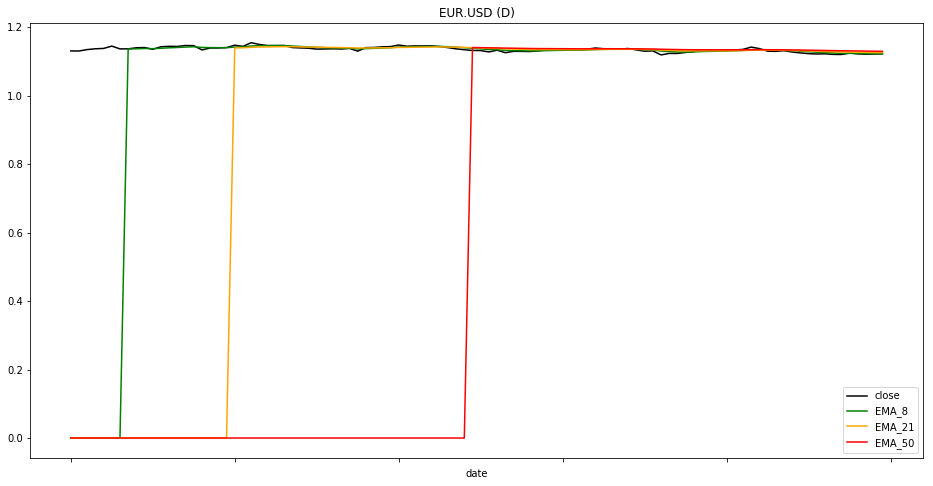

In [18]:
df[['close', 'EMA_8', 'EMA_21', 'EMA_50']].plot(figsize=(16,8), color=['black', 'green', 'orange', 'red'], title="EUR.USD (D)")

In [20]:
df.to_csv (r'C:\Users\Andy\Documents\AVdata\FXDtest1.csv', index = None, header=True) 

## Indicator Samples

### Cumulative Log Return

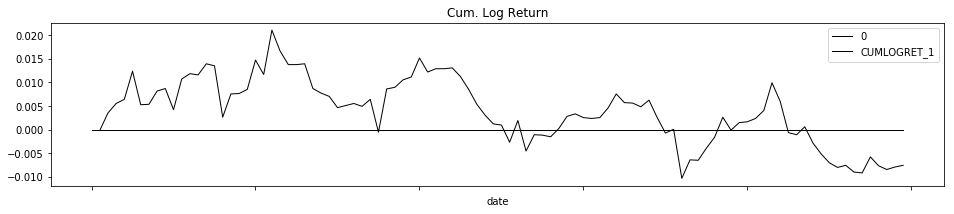

In [21]:
df.ta.log_return(cumulative=True, append=True)
df[['0', 'CUMLOGRET_1']].plot(figsize=(16, 3), color=['black'], linewidth=1, title="Cum. Log Return")

### Absolute Price Oscillator (APO)

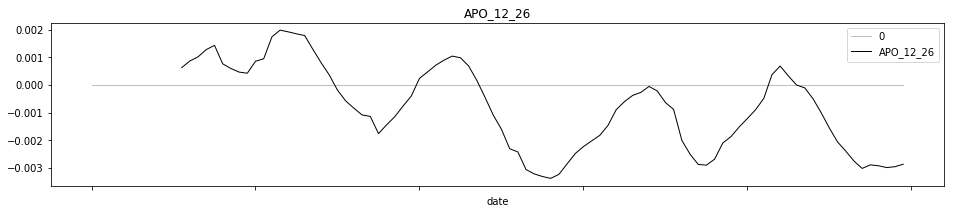

In [22]:
df.ta.apo(append=True)
apo_12_26 = df[['0', 'APO_12_26']]
apo_12_26.plot(figsize=(16, 3), color=['silver', 'black'], linewidth=1, title='APO_12_26')

### MACD

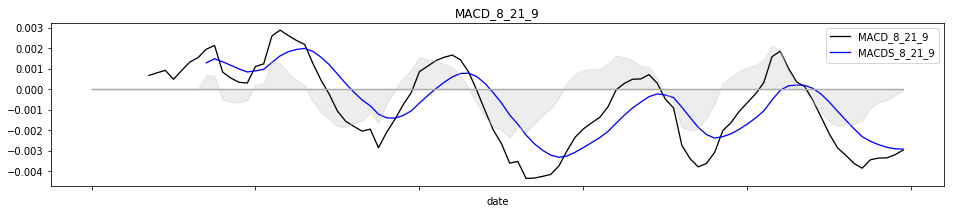

In [23]:
macddf = df.ta.macd(fast=8, slow=21, signal=9, min_periods=None, append=True)
macddf[[macddf.columns[0], macddf.columns[2]]].plot(figsize=(16, 3), color=['black', 'blue'], linewidth=1.3)
macddf[macddf.columns[1]].plot.area(figsize=(16, 3), stacked=False, color=['#dddddd'], linewidth=1, title=macddf.name)
df['0'].plot(figsize=(16, 3), color=['#aaaaaa'], linewidth=1.4)

### ZScore

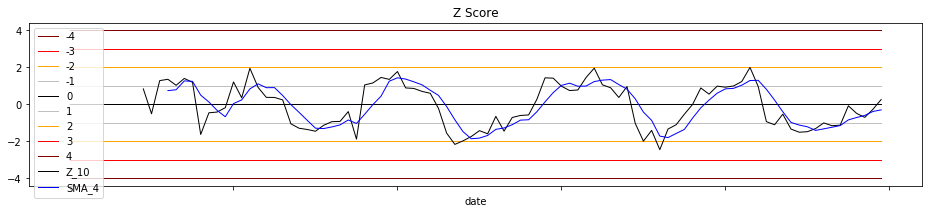

In [24]:
df.ta.zscore(length=10, append=True)
df.ta.sma(df[df.columns[-1]], length=4, append=True)
zcolors = ['maroon', 'red', 'orange', 'silver', 'black', 'silver', 'orange', 'red', 'maroon', 'black', 'blue']
df[['-4', '-3', '-2', '-1', '0', '1', '2', '3', '4', 'Z_10', 'SMA_4']].plot(figsize=(16, 3), color=zcolors, linewidth=1, title="Z Score")